# Data Understanding
## Data Description
The dataset (which is located in the `./data/` folder) contains the following relations:
* Relation `account` (containing 4500 records) where each record describes an account
* Relation `client` (containing 5369 records) where each record describes a client
* Relation `disposition` (containing 5369 records) where each record links a client to an account and indicates the rights of clients to operate accounts
* Relation `permanent order` (containing 6471 records) where each record describes a payment order
* Relation `transaction` (containing 1056320 records) where each record describes a transaction in an account
* Relation `loan` (containing 682 records) where each record describes a loan granted for a given account
* Relation `credit card` (containing 892 records) where each record describes a credit card issued to an account
* Relation `demographic data` (containing 77 records) where each record describes the demography of a district

### Relation `account`
Each account has static (e.g. date of creation, address of branch) and dynamic attributes (e.g. transactions and balances) which are given in the `permanent order` and `transaction` relations. This relation follows the schema:
| Attribute | Description |
| --------- | ----------- |
| account_id **int** | Account identifier |
| district_id **int** | Identifier of the district where the account is located |
| date **int** | Account creation date (format: YYMMDD) |
| frequency **string** | Frequency of issuance of statements |

Located in `./data/account.csv`

### Relation `client`
This relation contains attributes of the people who can manipulate accounts. One client can have multiple accounts and multiple clients can manipulate the same account.
| Attribute | Description |
| --------- | ----------- |
| client_id **int** | Client identifier |
| birth_number **string** | Birthday and sex (format: YYMMDD - in women, the month is incremented by 50), autoconverted to **int** by pandas |
| district_id **int** | Identifier of the district where the client lives |

Located in `./data/client.csv`

### Relation `disposition`
This relation links clients to accounts and includes the rights of clients to operate accounts.
| Attribute | Description |
| --------- | ----------- |
| disp_id **int** | Disposition identifier |
| client_id **int** | Client Identifier |
| account_id **int** | Account Identifier |
| type **string** | Disposition type (*owner*/*user*), only the owner can issue permanent orders and borrow money |

Located in `./data/disp.csv`

### Relation `permanent order`
| Attribute | Description |
| --------- | ----------- |
| order_id **int** | Order identifier |
| account_id **int** | Account identifier |
| bank_to | Recipient's bank (each bank has a unique two-letter code) |
| account_to | Recipient's account identifier |
| amount **int** | Debited amount |
| k_symbol | Characterization of the payment |

Not located in the `./data/` folder. Can it be built from the other relations?

### Relation `transaction`
| Attribute | Description |
| --------- | ----------- |
| trans_id | Transaction identifier |
| account_id | Account identifer |
| date | Transaction date (format: YYMMDD) |
| type | +/- transaction |
| operation | Transaction mode | 	 
| amount | Amount of money transacted |
| balance |	Balance after transaction |
| k_symbol | Characterization of the transaction |
| bank | Bank of the partner (each bank has unique two-letter code) |
| account | Account of the partner |

Located in `./data/trans_train.csv` and `./data/trans_test.csv` as training and test data for the model.

### Relation `loan`
Describes a service provided by the bank to its clients. Only one loan can be granted for an account.
| Attribute | Description |
| --------- | ----------- |
| loan_id | Loan identifier |
| account_id | Account identifier |
| date | Date when the loan was granted (format: YYMMDD) |
| amount | Amount of money borrowed |
| duration | Loan duration |
| payments | Number of monthly payments made on the loan | 	 
| status | Status of the loan payment ('A' stands for contract finished, no problems, 'B' stands for contract finished, loan not paid, 'C' stands for running contract, OK so far, 'D' stands for running contract, client in debt) |

Located in `./data/loan_train.csv` and `./data/loan_test.csv` as training and test data for the model.

### Relation `credit card`
Describes a service provided by the bank to its clients. Multiple credit cards can be issued for the same account.
| Attribute | Description |
| --------- | ----------- |
| card_id | Card identifier |
| disp_id | Disposition to an account |
| type **string** | Type of card (possible values are "junior", "classic", "gold") |
| issued | Issue date in the form YYMMDD |

Located in `./data/card_train.csv` and `./data/card_test.csv` as training and test data for the model.

### Relation `demographic data`
Contains publicly available information about the districts, additional information about the clients can be deduced from this.
| Attribute | Description |
| --------- | ----------- |
| A1 | District Identifier |
| A2 | District name |
| A3 | Region | 
| A4 | No. of inhabitants | |
| A5 | No. of municipalities with inhabitants < 499 |
| A6 | No. of municipalities with inhabitants 500-1999 |
| A7 | No. of municipalities with inhabitants 2000-9999 |
| A8 | No. of municipalities with inhabitants >10000 |
| A9 | No. of cities |
| A10 |	Ratio of urban inhabitants |
| A11 |	Average salary |
| A12 |	Unemployment rate '95 |
| A13 |	Unemployment rate '96 |
| A14 |	No. of enterpreneurs per 1000 inhabitants |
| A15 |	No. of commited crimes '95 |
| A16 |	No. of commited crimes '96 |

## Statistics
Now we're going to do a deep dive at each relation separately and do some statistics on them. But first we need to import pandas and matplotlib.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

### Relation `account`
For the `account` relation we are going to open it with an index on the account_id and view the first few lines in the relation table.

In [15]:
account_df = pd.read_csv('./data/account.csv', sep=';', index_col='account_id')
account_df.head()

,district_id,frequency,date
account_id,,,
576,55,monthly issuance,930101
3818,74,monthly issuance,930101
704,55,monthly issuance,930101
2378,16,monthly issuance,930101
2632,24,monthly issuance,930102


Now we're going to check if there are any null or NaN values in the relation table (there are none) Maybe more useful in the 03-Data-Preparation notebook.

In [4]:
account_df.isna().sum()


district_id    0
frequency      0
date           0
dtype: int64

In [5]:
account_df['account_age'] = 2021 - ((account_df['date'] // 10000) + 1900)
account_df.head()


,district_id,frequency,date,account_age
account_id,,,,
576,55,monthly issuance,930101,28
3818,74,monthly issuance,930101,28
704,55,monthly issuance,930101,28
2378,16,monthly issuance,930101,28
2632,24,monthly issuance,930102,28


In [6]:
account_df['account_age'].unique()


array([28, 27, 26, 25, 24])

In [7]:
account_df['frequency'].unique()


array(['monthly issuance', 'issuance after transaction',
       'weekly issuance'], dtype=object)

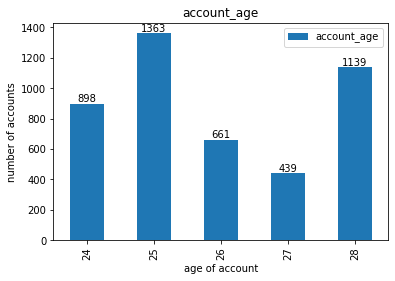

In [8]:
account_age = account_df['account_age'].value_counts(dropna=False).sort_index()
ax = account_age.plot.bar(
    title='account_age',
    legend=True,
    xlabel='age of account',
    ylabel='number of accounts'
)
ax.bar_label(ax.containers[0])
plt.show()


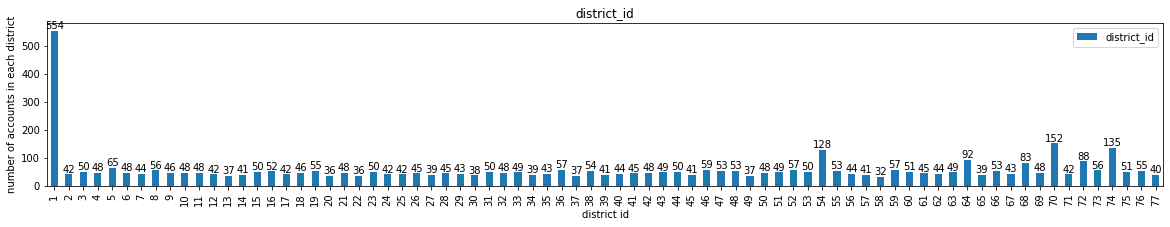

In [17]:
district_id = account_df['district_id'].value_counts(dropna=False).sort_index()
ax = district_id.plot.bar(
    title='district_id',
    legend=True,
    xlabel='district id',
    ylabel='number of accounts in each district',
    figsize=(20, 3)
)
ax.bar_label(ax.containers[0])
plt.show()
